# Question
Build an image classification Convolutional Neural Network (CNN) using the MNIST dataset on Kaggle




#Libraries
These are the Libraries we'll be using for the code

In [43]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import cv2
np.random.seed(42)  # This allows us to reproduce the results from our script
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam, SGD
from keras.utils import to_categorical  # help us to transform our data later
from sklearn.model_selection import train_test_split

# Exploratory Analysis and Preprocessing
## Step 1: Import the data

I used the mnist_test.csv data from the kaggle link sent in class.

In [44]:
#connect colab to my local files
from google.colab import files

#upload files from my local machine to colab
uploaded = files.upload() #used mnist_test.csv sent attached

Saving mnist_test.csv to mnist_test (1).csv


In [45]:
#assign the data to the variable mnist
mnist = pd.read_csv('mnist_test.csv')

## Step 2: Prepare the Input Data

For a multi-layer perceptron model we must reduce the images down into a vector of pixels. In this case the 28×28 sized images will be 784 pixel input values.

We can do this transform easily using the reshape() function on the NumPy array. We can also reduce our memory requirements by forcing the precision of the pixel values to be 32 bit.

In [79]:
# Extract features and labels
X = mnist.drop('label', axis=1).values
y = mnist['label'].values

# Reshape features to 28x28 images
X = X.reshape(-1, 28, 28)

# Normalize pixel values
X = X / 255.0


In [80]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
print('Total no of Images: ',X_train.shape[0])
print('Size of Image:', X_train.shape[1:])
print('Total no of labels:', y_train.shape)

Total no of Images:  8000
Size of Image: (28, 28)
Total no of labels: (8000,)


The following code allows us to look at the input data, the images and their associated labels

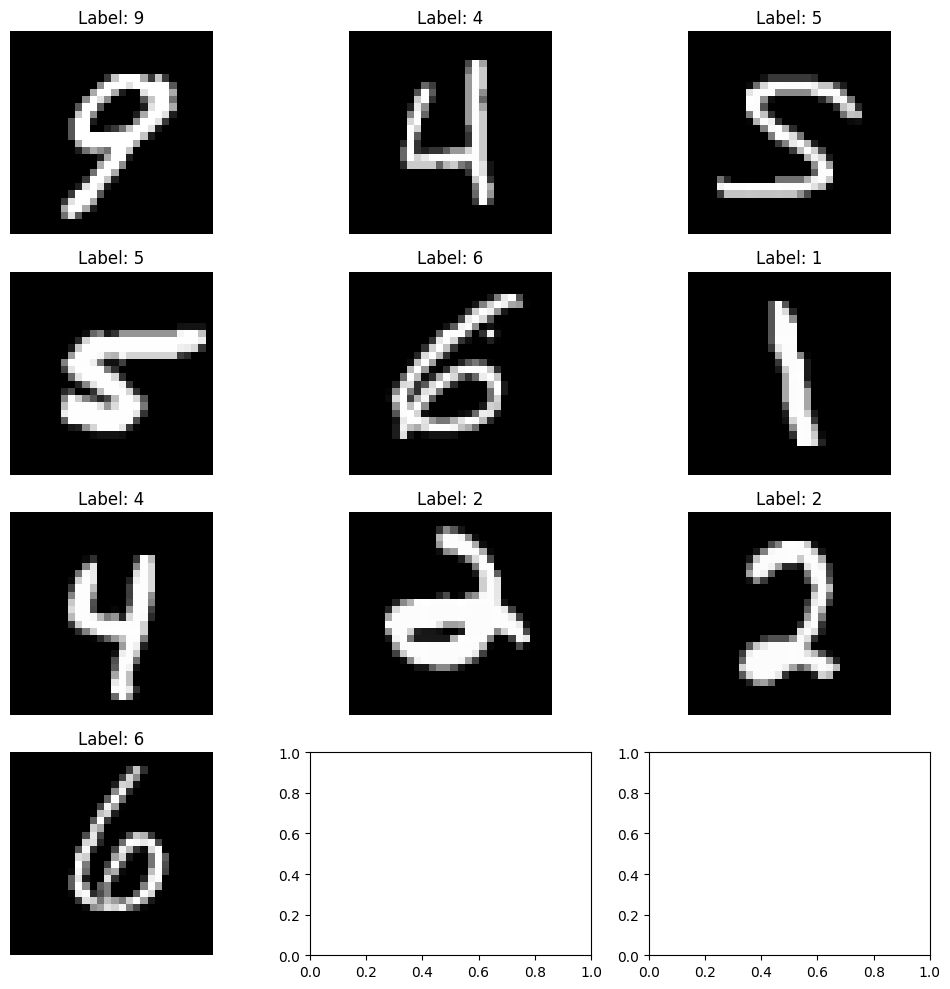

In [82]:
# Define the range of images you want to display
start_index = 0  # Starting index of the range
end_index = 9    # Ending index of the range

# Create a subplot grid
num_cols = 3  # Number of columns in the grid
num_rows = (end_index - start_index + 1) // num_cols + ((end_index - start_index + 1) % num_cols > 0)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))

# Iterate over the range of images and display them
for i, ax in enumerate(axes.flat):
    if i + start_index <= end_index:
        ax.imshow(X_train[i + start_index], cmap=plt.get_cmap('gray'))
        ax.set_title('Label: {}'.format(y_train[i + start_index]))
        ax.axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


In [83]:
#reshape for model
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# print(X_train[0])
X_train.shape

(8000, 784)

## Step 4: One Hot Encoding

The output variable is an integer from 0 to 9. This is a multi-class classification problem. As such, it is good practice to use a one hot encoding of the class values, transforming the vector of class integers into a binary matrix.

In [84]:
# One-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train.shape)

(8000, 10)


In [85]:
num_classes = y_test.shape[1]
num_pixels = 784

# CNN Model
## Step 1: Define, Build and Compile The Model

In [86]:
# define baseline model

def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(256, input_dim=num_pixels, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    return model

In [87]:
# build the model
model = baseline_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 256)               200960    
                                                                 
 dense_10 (Dense)            (None, 64)                16448     
                                                                 
 dense_11 (Dense)            (None, 10)                650       
                                                                 
Total params: 218058 (851.79 KB)
Trainable params: 218058 (851.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


We will use an Optimiser for this.

**Optimizer: SGD (Stochastic Gradient Descent)**

Stochastic gradient descent is an iterative method for optimizing an objective function with suitable smoothness properties (e.g. differentiable or subdifferentiable).

In [88]:
#compile the model
opt = SGD(lr = 0.001)
model.compile(loss='categorical_crossentropy', optimizer= opt, metrics=['accuracy'])

## Step 2: Train the Model

To fit the model, we have to declare the batch size and number of epochs to train for, then pass in our training data.

In [89]:
#train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)



Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 1.5301 - accuracy: 0.6119
Epoch 2/10
250/250 [==============================] - 0s 2ms/step - loss: 0.6628 - accuracy: 0.8518
Epoch 3/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4595 - accuracy: 0.8834
Epoch 4/10
250/250 [==============================] - 0s 2ms/step - loss: 0.3792 - accuracy: 0.8988
Epoch 5/10
250/250 [==============================] - 0s 2ms/step - loss: 0.3338 - accuracy: 0.9104
Epoch 6/10
250/250 [==============================] - 0s 2ms/step - loss: 0.3034 - accuracy: 0.9168
Epoch 7/10
250/250 [==============================] - 0s 2ms/step - loss: 0.2806 - accuracy: 0.9221
Epoch 8/10
250/250 [==============================] - 0s 2ms/step - loss: 0.2632 - accuracy: 0.9269
Epoch 9/10
250/250 [==============================] - 0s 2ms/step - loss: 0.2472 - accuracy: 0.9317
Epoch 10/10
250/250 [==============================] - 0s 2ms/step - loss: 0.2340 - accuracy: 0.9348

The model performs with an accuracy of $93.23\%$ in the 10th epoch.

## Step 3: Test the Model
Let's evaluate our model based on the test data.

In [90]:
#evaluate model
scores = model.evaluate(X_test, y_test, verbose=1)
print("Error: %.2f%%" % (100-scores[1]*100))

63/63 [==============================] - 0s 1ms/step - loss: 0.2840 - accuracy: 0.9155
Error: 8.45%


The model Evaluation can be interpreted ass follows:

- **63/63**: This indicates that the evaluation was performed over 63 batches. Each batch represents a subset of the test dataset.


- **Loss**: 0.2897: This is the average loss (or error) computed over the entire test dataset. In this case, the average loss is approximately 0.2897.

- **Accuracy**: 0.9160: This is the accuracy of the model on the test dataset. It indicates that the model correctly predicted approximately 91.60% of the samples in the test dataset.

- **Error**: 8.40%: This is simply a complementary way to express the accuracy. It shows the error rate of the model on the test dataset, which is approximately 8.40%. This is obtained by subtracting the accuracy from 100%.

## Step 4: Predict
To test the functioning of the model, we can use some sample images of digits.

### 1. Using one of the MNIST images

First I defined the image dimensions and uploaded my desired image. (predimage.png)

In [91]:
#define image width and height
img_width, img_height = 28, 28

In [92]:
#connect colab to my local files
from google.colab import files

#upload image file for predicting from my local machine to colab
uploaded = files.upload() #used predimage.png sent attached

Saving predimage.png to predimage (1).png


I then prepared the image to be evaluated by the model

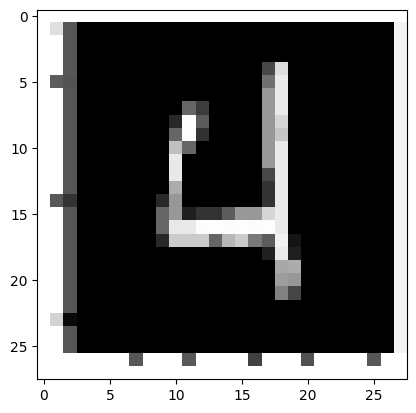

In [93]:
# Read the image
image_path = "predimage.png"
ii = cv2.imread(image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(ii, cv2.COLOR_BGR2GRAY)

# Resize the image to 28x28 pixels
resized_image = cv2.resize(gray_image, (28, 28))

# Visualize the grayscale image
plt.imshow(resized_image, cmap='gray')
plt.show()

# Prepare the image data for prediction
x = np.expand_dims(resized_image, axis=0)  # Add a batch dimension
x = x.reshape((1, -1))  # Flatten the image to match the expected input shape of your model


I then used the model to predict the image label, and displayed the probabilities across all possible classes.

In [94]:
# Predict probabilities for each class
probabilities = model.predict(x)

# Get the predicted class
predicted_class = np.argmax(probabilities)

# Print the predicted class
print('Predicted value is:', predicted_class)

# Print probabilities across all numbers
print('Probability across all numbers:', probabilities)


1/1 [==============================] - 0s 39ms/step
Predicted value is: 4
Probability across all numbers: [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


The model correctly labels the image label as 4, with a probability of 1 at the label 4 class. Thus the model is well suited to predict MNIST digit labels.

### 2. Using a non - MNIST image

I used the same procedure as above with an image of a digit obtained online.

In [95]:
#define image width and height
img_width, img_height = 28, 28

In [96]:
#connect colab to my local files
from google.colab import files

#upload image file for predicting from my local machine to colab
uploaded = files.upload() #used imagepredict.jpg sent attached

Saving imagepredict.jpg to imagepredict (1).jpg


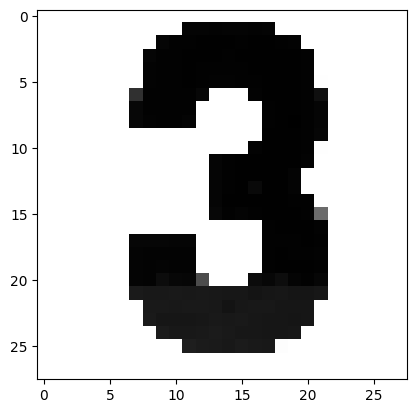

In [98]:
# Read the image
image_path = "imagepredict.jpg"
ii = cv2.imread(image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(ii, cv2.COLOR_BGR2GRAY)

# Resize the image to 28x28 pixels
resized_image = cv2.resize(gray_image, (28, 28))

# Visualize the grayscale image
plt.imshow(resized_image, cmap='gray')
plt.show()

# Prepare the image data for prediction
x = np.expand_dims(resized_image, axis=0)  # Add a batch dimension
x = x.reshape((1, -1))  # Flatten the image to match the expected input shape of your model

In [99]:
# Predict probabilities for each class
probabilities = model.predict(x)

# Get the predicted class
predicted_class = np.argmax(probabilities)

# Print the predicted class
print('Predicted value is:', predicted_class)

# Print probabilities across all numbers
print('Probability across all numbers:', probabilities)

1/1 [==============================] - 0s 14ms/step
Predicted value is: 5
Probability across all numbers: [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


The model incorrectly labels the 3 digit as a 5, with a probabiity of 1 at the class 5. Thus, it is not well suited for predicting images not of the mnist dataset.

